In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline
pd.options.display.max_rows = 68
pd.options.display.max_columns = 68

In [38]:
# read the sequences file
arquivo = 'hikoyu_fasta.txt'

file_content = open(arquivo, "r")

all_lines = file_content.readlines();

sequences = {}
sequences_info = {}
description = ''

for line in all_lines:
    
    sequence = []
    
    if ">" in line:
        description = line[1:line.find('.') + 2 ]
        sequence = []
        sequences[description] = sequence
    else:
        sequences[description].append(line)
        
file_content.close()

In [39]:
#count A,T,C,G,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,CT,CG,GG,GA,GT,GC for each sequence

for description in sequences:
    
    sequences_info[description] = {}
    
    sequences_info[description]['A'] = 0
    sequences_info[description]['T'] = 0
    sequences_info[description]['C'] = 0
    sequences_info[description]['G'] = 0
    
    sequences_info[description]['AA'] = 0
    sequences_info[description]['AT'] = 0
    sequences_info[description]['AC'] = 0
    sequences_info[description]['AG'] = 0
    
    sequences_info[description]['TA'] = 0
    sequences_info[description]['TT'] = 0
    sequences_info[description]['TC'] = 0
    sequences_info[description]['TG'] = 0
    
    sequences_info[description]['CA'] = 0
    sequences_info[description]['CT'] = 0
    sequences_info[description]['CC'] = 0
    sequences_info[description]['CG'] = 0
    
    sequences_info[description]['GA'] = 0
    sequences_info[description]['GT'] = 0
    sequences_info[description]['GC'] = 0
    sequences_info[description]['GG'] = 0
    
    sequences_info[description]['SIZE'] = 0
    
   # key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'
    #key = '>MN996532.1 Bat coronavirus RaTG13, complete genome\n'
   
    for line in sequences[description]:
        
        sequences_info[description]['SIZE'] += len(line.replace('\n', ''))
        sequences_info[description]['A'] += line.count('A')
        sequences_info[description]['T'] += line.count('T')
        sequences_info[description]['C'] += line.count('C')
        sequences_info[description]['G'] += line.count('G')
        
        sequences_info[description]['AA'] += line.count('AA')
        sequences_info[description]['AT'] += line.count('AT')
        sequences_info[description]['AC'] += line.count('AC')
        sequences_info[description]['AG'] += line.count('AG')
    
        sequences_info[description]['TA'] += line.count('AT')
        sequences_info[description]['TT'] += line.count('TT')
        sequences_info[description]['TC'] += line.count('TC')
        sequences_info[description]['TG'] += line.count('TG')
    
        sequences_info[description]['CA'] += line.count('CA')
        sequences_info[description]['CT'] += line.count('CT')
        sequences_info[description]['CC'] += line.count('CC')
        sequences_info[description]['CG'] += line.count('CG')
    
        sequences_info[description]['GA'] += line.count('GA')
        sequences_info[description]['GT'] += line.count('GT')
        sequences_info[description]['GC'] += line.count('GC')
        sequences_info[description]['GG'] += line.count('GG')   
    

In [40]:
#calc dinucleotideo bias

for description in sequences:
         
    fA = sequences_info[description]['A'] / sequences_info[description]['SIZE'] 
    fT = sequences_info[description]['T'] / sequences_info[description]['SIZE']
    fC = sequences_info[description]['C'] / sequences_info[description]['SIZE']
    fG = sequences_info[description]['G'] / sequences_info[description]['SIZE'] 
        
    fAA = sequences_info[description]['AA'] / sequences_info[description]['SIZE']       
    fAT = sequences_info[description]['AT'] / sequences_info[description]['SIZE']       
    fAC = sequences_info[description]['AC'] / sequences_info[description]['SIZE']       
    fAG = sequences_info[description]['AG'] / sequences_info[description]['SIZE']    
      
    fTA = sequences_info[description]['TA'] / sequences_info[description]['SIZE']       
    fTT = sequences_info[description]['TT'] / sequences_info[description]['SIZE']       
    fTC = sequences_info[description]['TC'] / sequences_info[description]['SIZE']       
    fTG = sequences_info[description]['TG'] / sequences_info[description]['SIZE']       

    fCA = sequences_info[description]['CA'] / sequences_info[description]['SIZE']       
    fCT = sequences_info[description]['CT'] / sequences_info[description]['SIZE']       
    fCC = sequences_info[description]['CC'] / sequences_info[description]['SIZE']       
    fCG = sequences_info[description]['CG'] / sequences_info[description]['SIZE']       

    fGA = sequences_info[description]['GA'] / sequences_info[description]['SIZE']       
    fGT = sequences_info[description]['GT'] / sequences_info[description]['SIZE']       
    fGC = sequences_info[description]['GC'] / sequences_info[description]['SIZE']       
    fGG = sequences_info[description]['GG'] / sequences_info[description]['SIZE']
        
   # sequences_info[description]['fA'] = fA
    sequences_info[description]['fT'] = fT
    sequences_info[description]['fC'] = fC
    sequences_info[description]['fG'] = fG
       
    sequences_info[description]['pAA'] = fAA/(fA*fA)
    sequences_info[description]['pAT'] = fAT/(fA*fT)
    sequences_info[description]['pAC'] = fAC/(fA*fC)
    sequences_info[description]['pAG'] = fAC/(fA*fG)

    sequences_info[description]['pTA'] = fTA/(fT*fA)
    sequences_info[description]['pTT'] = fTT/(fT*fT)
    sequences_info[description]['pTC'] = fTC/(fT*fC)
    sequences_info[description]['pTG'] = fTC/(fT*fG)
      
    sequences_info[description]['pCA'] = fCA/(fC*fA)
    sequences_info[description]['pCT'] = fCT/(fC*fT)
    sequences_info[description]['pCC'] = fCC/(fC*fC)
    sequences_info[description]['pCG'] = fCC/(fC*fG)

    sequences_info[description]['pGA'] = fGA/(fG*fA)
    sequences_info[description]['pGT'] = fGT/(fG*fT)
    sequences_info[description]['pGC'] = fGC/(fG*fC)
    sequences_info[description]['pGG'] = fGC/(fG*fG)


In [41]:
#key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'
key = 'MG772933.1'
sequences_info[key]

{'A': 8740,
 'T': 9468,
 'C': 5574,
 'G': 6020,
 'AA': 2023,
 'AT': 2246,
 'AC': 1963,
 'AG': 1720,
 'TA': 2246,
 'TT': 2377,
 'TC': 1436,
 'TG': 2556,
 'CA': 2057,
 'CT': 2060,
 'CC': 775,
 'CG': 492,
 'GA': 1620,
 'GT': 1957,
 'GC': 1204,
 'GG': 998,
 'SIZE': 29802,
 'fT': 0.31769679887255886,
 'fC': 0.1870344272196497,
 'fG': 0.20199986578082008,
 'pAA': 0.7892569736449373,
 'pAT': 0.8088825759223652,
 'pAC': 1.2008459922211578,
 'pAG': 1.1118796612360022,
 'pTA': 0.8088825759223652,
 'pTT': 0.7902383346639444,
 'pTC': 0.8109136980813054,
 'pTG': 0.7508360387217935,
 'pCA': 1.2583495700452987,
 'pCT': 1.16328845267931,
 'pCC': 0.7433839566525036,
 'pCG': 0.6883093312925339,
 'pGA': 0.9175980902711787,
 'pGT': 1.0232493926034472,
 'pGC': 1.0693218514531755,
 'pGG': 0.9900996677740864}

In [42]:
key = 'MT126808.1'
#key = '>MN996532.1 Bat coronavirus RaTG13, complete genome\n'
sequences_info[key]

{'A': 8927,
 'T': 9596,
 'C': 5492,
 'G': 5861,
 'AA': 2126,
 'AT': 2275,
 'AC': 1987,
 'AG': 1705,
 'TA': 2275,
 'TT': 2424,
 'TC': 1392,
 'TG': 2543,
 'CA': 2039,
 'CT': 2031,
 'CC': 773,
 'CG': 430,
 'GA': 1591,
 'GT': 1957,
 'GC': 1151,
 'GG': 962,
 'SIZE': 29876,
 'fT': 0.3211942696478779,
 'fC': 0.18382648279555497,
 'fG': 0.1961775338063998,
 'pAA': 0.7970299503977404,
 'pAT': 0.7934290140775491,
 'pAC': 1.2108330162976855,
 'pAG': 1.1346007380151661,
 'pTA': 0.7934290140775491,
 'pTT': 0.7864562853669229,
 'pTC': 0.7891161254067077,
 'pTG': 0.7394345266564817,
 'pCA': 1.2425206443034629,
 'pCT': 1.151361243319701,
 'pCC': 0.7656686889862709,
 'pCG': 0.7174633065880566,
 'pGA': 0.9084800071374582,
 'pGT': 1.0395642016284012,
 'pGC': 1.0683056479726432,
 'pGG': 1.001046684638416}

In [43]:
#creating a dataframe
df_original = pd.DataFrame.from_dict(sequences_info, orient='index', columns=[ 'fT', 'fC', 'fG',
                                                                     'pAA','pAT', 'pAC', 'pAG',
                                                                     'pTA','pTA', 'pTC', 'pTG',
                                                                     'pCA','pCT', 'pCC', 'pCG',
                                                                     'pGA','pGT', 'pGC', 'pGG'])

In [44]:
df_original

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.321261,0.183798,0.196094,0.801285,0.793189,1.213801,1.137693,0.793189,0.793189,0.785843,0.736569,1.247959,1.154650,0.765634,0.717626,0.907296,1.037046,1.074580,1.007201
LC522972.1,0.321139,0.183714,0.196231,0.796744,0.790769,1.210424,1.133211,0.790769,0.790769,0.780038,0.730280,1.247602,1.152188,0.768541,0.719515,0.910677,1.039387,1.076952,1.008253
LC522973.1,0.321139,0.183714,0.196231,0.796744,0.790420,1.211033,1.133782,0.790420,0.790420,0.780038,0.730280,1.248821,1.151620,0.768541,0.719515,0.910677,1.040450,1.075095,1.006515
LC522974.1,0.321106,0.183747,0.196231,0.796744,0.790502,1.210813,1.133782,0.790502,0.790502,0.779978,0.730356,1.248593,1.152098,0.768261,0.719384,0.910677,1.040027,1.075828,1.007384
LC522975.1,0.321139,0.183747,0.196198,0.796744,0.790769,1.210813,1.133975,0.790769,0.790769,0.779896,0.730404,1.248593,1.151978,0.768261,0.719507,0.910832,1.040096,1.076011,1.007728
LC528232.1,0.321216,0.183700,0.196141,0.801196,0.791962,1.217347,1.140134,0.791962,0.791962,0.784385,0.734634,1.246578,1.155608,0.769029,0.720252,0.913705,1.034008,1.074809,1.006637
LC528233.1,0.321082,0.183901,0.196274,0.798901,0.799448,1.210140,1.133849,0.799448,0.799448,0.782723,0.733378,1.252142,1.163890,0.767352,0.718976,0.907421,1.042755,1.070125,1.002661
LR757995.1,0.321003,0.183784,0.196204,0.796031,0.789272,1.208606,1.132102,0.789272,0.789272,0.792144,0.742001,1.244548,1.155304,0.766124,0.717629,0.913556,1.044967,1.075979,1.007869
LR757996.1,0.320945,0.183742,0.196230,0.799489,0.791767,1.209359,1.132394,0.791767,0.791767,0.787465,0.737350,1.248351,1.164448,0.755671,0.707580,0.897358,1.034522,1.059512,0.992084
LR757997.1,0.207602,0.123180,0.129441,1.213914,1.195414,1.839265,1.750299,1.195414,1.195414,1.229511,1.170039,1.902932,1.772412,1.121303,1.067065,1.369273,1.587911,1.645415,1.565826


In [45]:
df_original.describe()

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.319309,0.182925,0.195282,0.803903,0.798369,1.220289,1.143313,0.798369,0.798369,0.795349,0.745182,1.254288,1.165599,0.770062,0.721479,0.913967,1.048179,1.076738,1.008819
std,0.013758,0.007366,0.008135,0.050520,0.048967,0.076253,0.074820,0.048967,0.048967,0.053615,0.052430,0.079968,0.074951,0.043412,0.042748,0.056253,0.066541,0.070158,0.068709
min,0.207602,0.123180,0.129441,0.788426,0.784220,1.200846,1.111880,0.784220,0.784220,0.779800,0.730280,1.228956,1.151238,0.743384,0.688309,0.889707,1.023249,1.056582,0.989443
25%,0.320960,0.183711,0.196145,0.797021,0.791412,1.209075,1.132685,0.791412,0.791412,0.787312,0.737346,1.241471,1.152463,0.764832,0.716364,0.906404,1.040019,1.066494,0.998826
50%,0.321091,0.183756,0.196201,0.797430,0.792441,1.210795,1.133861,0.792441,0.792441,0.789473,0.739443,1.242771,1.153000,0.765795,0.717289,0.907742,1.041047,1.067531,0.999916
75%,0.321143,0.183824,0.196233,0.798584,0.793081,1.211780,1.135029,0.793081,0.793081,0.790163,0.740184,1.248526,1.160124,0.766419,0.717775,0.908672,1.041668,1.070691,1.002956
max,0.321308,0.187034,0.202000,1.213914,1.195414,1.839265,1.750299,1.195414,1.195414,1.229511,1.170039,1.902932,1.772412,1.121303,1.067065,1.369273,1.587911,1.645415,1.565826


In [46]:
#standardization
#Useful: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_original.values)
df_std = pd.DataFrame(std_data, index=df_original.index, columns=df_original.columns)

In [47]:
df_std

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.142953,0.119317,0.100554,-0.052209,-0.106577,-0.085718,-0.075681,-0.106577,-0.106577,-0.178624,-0.165502,-0.079731,-0.147159,-0.102772,-0.090796,-0.119481,-0.168557,-0.030988,-0.023735
LC522972.1,0.134037,0.107810,0.117619,-0.142752,-0.156364,-0.130343,-0.136025,-0.156364,-0.156364,-0.287697,-0.286338,-0.084225,-0.180261,-0.035311,-0.046271,-0.058921,-0.133107,0.003074,-0.008299
LC522973.1,0.134037,0.107810,0.117619,-0.142752,-0.163537,-0.122291,-0.128342,-0.163537,-0.163537,-0.287697,-0.286338,-0.068869,-0.187887,-0.035311,-0.046271,-0.058921,-0.117025,-0.023589,-0.033788
LC522974.1,0.131586,0.112387,0.117619,-0.142752,-0.161842,-0.125205,-0.128342,-0.161842,-0.161842,-0.288839,-0.284876,-0.071735,-0.181468,-0.041807,-0.049359,-0.058921,-0.123425,-0.013072,-0.021044
LC522975.1,0.134037,0.112387,0.113474,-0.142752,-0.156364,-0.125205,-0.125738,-0.156364,-0.156364,-0.290367,-0.283945,-0.071735,-0.183082,-0.041807,-0.046467,-0.056139,-0.122380,-0.010436,-0.016004
LC528232.1,0.139651,0.105939,0.106397,-0.053965,-0.131812,-0.038871,-0.042802,-0.131812,-0.131812,-0.206021,-0.202677,-0.097122,-0.134290,-0.023973,-0.028917,-0.004703,-0.214556,-0.027704,-0.032005
LC528233.1,0.129856,0.133381,0.122963,-0.099747,0.022212,-0.134094,-0.127436,0.022212,0.022212,-0.237254,-0.226814,-0.027034,-0.022970,-0.062896,-0.058993,-0.117229,-0.082125,-0.094963,-0.090302
LR757995.1,0.124052,0.117435,0.114208,-0.156966,-0.187153,-0.154353,-0.150958,-0.187153,-0.187153,-0.060233,-0.061112,-0.122701,-0.138370,-0.091388,-0.090737,-0.007363,-0.048626,-0.010903,-0.013929
LR757996.1,0.119845,0.111643,0.117462,-0.088006,-0.135832,-0.144411,-0.147024,-0.135832,-0.135832,-0.148156,-0.150494,-0.074791,-0.015461,-0.333960,-0.327560,-0.297450,-0.206767,-0.247353,-0.245386
LR757997.1,-8.180074,-8.171014,-8.153627,8.176135,8.168764,8.177771,8.172887,8.168764,8.168764,8.158042,8.163616,8.171637,8.156345,8.151043,8.144357,8.154033,8.171530,8.165868,8.167067


In [48]:
#create a distance matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

distance_matrix = pd.DataFrame(
    squareform(pdist(df_std, metric='euclidean')),
    columns = df_std.index,
    index = df_std.index
)


In [49]:
distance_matrix

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,0.000000,0.249481,0.252651,0.247521,0.245299,0.182815,0.319230,0.309511,0.519967,36.051962,0.287167,1.592893,0.252951,0.492019,0.252540,0.243535,0.322929,0.322929,0.237281,0.260278,0.227029,0.205591,0.235592,0.396479,0.541605,0.331124,0.897066,0.237261,0.253041,0.399530,0.243924,0.248314,0.245050,0.233296,0.224865,0.515499,0.243535,0.243535,0.237949,0.237949,0.230972,0.237760,0.191782,0.229687,0.239089,0.252011,0.276517,0.288046,0.555735,0.255394,0.223536,0.269138,0.230322,0.295789,0.255508,0.230445,0.228643,0.241060,0.202816,0.336093,0.300237,0.267306,0.205746,0.282586,0.282586,0.284247,0.282586,0.427839
LC522972.1,0.249481,0.000000,0.046813,0.030528,0.027462,0.233178,0.394540,0.353407,0.647712,36.133745,0.401046,1.700098,0.351366,0.617625,0.369867,0.368205,0.434738,0.434738,0.357153,0.380854,0.339645,0.338993,0.344932,0.442901,0.661683,0.505192,1.031469,0.363187,0.335161,0.573100,0.345050,0.347124,0.334732,0.344834,0.339830,0.588537,0.368205,0.368205,0.339155,0.339155,0.343307,0.062819,0.253402,0.337408,0.342281,0.373939,0.303484,0.401673,0.687901,0.389547,0.340736,0.308927,0.349258,0.383169,0.390005,0.344922,0.353773,0.352697,0.248224,0.387212,0.483813,0.436289,0.329959,0.399842,0.399842,0.399423,0.399842,0.485631
LC522973.1,0.252651,0.046813,0.000000,0.021509,0.028633,0.235758,0.393779,0.352774,0.634156,36.141459,0.396886,1.703402,0.341044,0.596712,0.356917,0.353880,0.417658,0.417658,0.344623,0.367315,0.328556,0.336229,0.333253,0.426858,0.642012,0.500580,1.026857,0.349346,0.324554,0.562165,0.336056,0.333977,0.322602,0.333054,0.327522,0.580188,0.353880,0.353880,0.323415,0.323415,0.332588,0.059478,0.249539,0.324388,0.333465,0.361267,0.305884,0.391431,0.671819,0.375303,0.327125,0.308144,0.337270,0.378193,0.375588,0.331066,0.340522,0.338412,0.241805,0.383549,0.493667,0.429589,0.320544,0.388692,0.388692,0.387433,0.388692,0.463521
LC522974.1,0.247521,0.030528,0.021509,0.000000,0.013242,0.233221,0.392845,0.350491,0.634908,36.138908,0.397807,1.698017,0.344987,0.601090,0.361251,0.358570,0.422676,0.422676,0.348682,0.372712,0.332712,0.331417,0.337460,0.427393,0.647953,0.499617,1.023382,0.353799,0.329346,0.564219,0.339555,0.339297,0.327500,0.337279,0.331757,0.580385,0.358570,0.358570,0.329266,0.329266,0.337013,0.049858,0.248429,0.329656,0.336796,0.365830,0.299490,0.394847,0.673823,0.379660,0.331983,0.305690,0.340747,0.375551,0.380165,0.335900,0.344319,0.343825,0.243189,0.382462,0.484646,0.427634,0.323524,0.392252,0.392252,0.391270,0.392252,0.470340
LC522975.1,0.245299,0.027462,0.028633,0.013242,0.000000,0.230678,0.387925,0.352295,0.640238,36.131383,0.393639,1.699513,0.347858,0.607471,0.363801,0.360571,0.425874,0.425874,0.350739,0.373952,0.333986,0.334231,0.339642,0.433905,0.653587,0.498382,1.026019,0.355690,0.331839,0.564047,0.341804,0.341209,0.330311,0.339398,0.333292,0.582142,0.360571,0.360571,0.331422,0.331422,0.338088,0.048449,0.250914,0.331076,0.339118,0.367579,0.303733,0.397822,0.678801,0.380860,0.332982,0.306459,0.343061,0.377030,0.381762,0.337958,0.346461,0.345709,0.242971,0.389795,0.482866,0.428650,0.323865,0.395045,0.395045,0.394370,0.395045,0.477124
LC528232.1,0.182815,0.233178,0.235758,0.233221,0.230678,0.000000,0.387331,0.351779,0.639738,36.018624,0.349032,1.675904,0.338225,0.

In [50]:
#create an adjacency matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

adj_matrix_0_018 = distance_matrix.copy()
adj_matrix_0_036 = distance_matrix.copy()
adj_matrix_0_055 = distance_matrix.copy()
adj_matrix_0_075 = distance_matrix.copy()
adj_matrix_2_0   = distance_matrix.copy()

In [51]:
#applying the thresholds
adj_matrix_0_018 = adj_matrix_0_018.applymap(lambda x: 1 if x <= 0.018 else 0)

In [52]:
adj_matrix_0_018

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


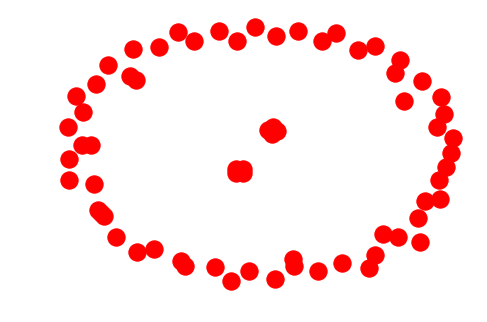

In [53]:
#creating graphs
#https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_adjacency.html

G=nx.from_pandas_adjacency(adj_matrix_0_018)
#print(nx.info(G))

#G = nx.from_numpy_matrix(adj_matrix_0_018.values, parallel_edges=True, 
#                         create_using=nx.MultiDiGraph())
#nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_size=50, node_color="red")
#nx.draw_networkx_edges(G, pos=nx.spring_layout(G), width=40, edge_color="black")

nx.draw(G, with_labels=False)
plt.show()

In [54]:
adj_matrix_0_036 = adj_matrix_0_036.applymap(lambda x: 1 if x <= 0.036 else 0)

In [55]:
adj_matrix_0_036

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


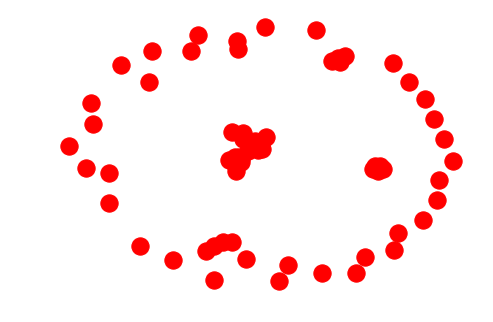

In [56]:
G=nx.from_pandas_adjacency(adj_matrix_0_036)
nx.draw(G, with_labels=False)
plt.show()

In [57]:
adj_matrix_0_055 = adj_matrix_0_055.applymap(lambda x: 1 if x <= 0.055 else 0)

In [58]:
adj_matrix_0_055

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


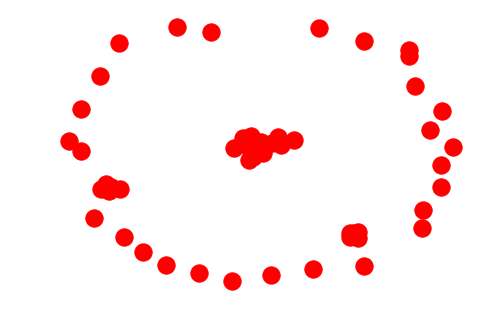

In [59]:
G=nx.from_pandas_adjacency(adj_matrix_0_055)
nx.draw(G, with_labels=False)
plt.show()

In [60]:
adj_matrix_0_075 = adj_matrix_0_075.applymap(lambda x: 1 if x <= 0.075 else 0)

In [61]:
adj_matrix_0_075

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


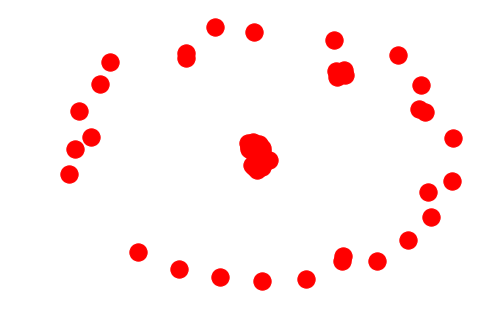

In [62]:
G=nx.from_pandas_adjacency(adj_matrix_0_075)
nx.draw(G, with_labels=False)
plt.show()

In [63]:
adj_matrix_2_0 = adj_matrix_2_0.applymap(lambda x: 1 if x <= 2.0 else 0)

In [64]:
adj_matrix_2_0

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522972.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522973.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522974.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522975.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528232.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528233.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757995.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757996.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


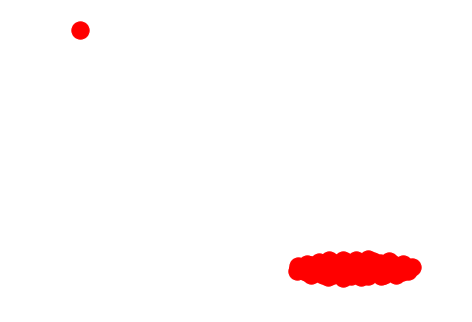

In [65]:
G=nx.from_pandas_adjacency(adj_matrix_2_0)
nx.draw(G, with_labels=False)
plt.show()